## Julia Tutorial 003 - VegaLite

In this tutorial we will walk through creating visualizations in Julia using the VegaLite.jl package.   At the time of recording this video (Oct 2020), this is my personal favorite visualization library in Julia.   If you have experience with the grammar of graphics framework, VegaLite.jl should be relatively intuitive.

In this tutorial we will create scatterplots, column and bar charts (including a stacked version), histograms, boxplots, and we will explore changing the configs on a VegaLite plot object.

The VegaLite.jl documentation can be found here.  I highly recommend reading to learn how to convert between the JSON specification and the @vlplot macro: https://www.queryverse.org/VegaLite.jl/stable/

More documentation on "marks": https://vega.github.io/vega-lite/docs/mark.html

More documentation on "configs": https://vega.github.io/vega-lite/docs/config.html

In [1]:
#import Pkg
#Pkg.add("VegaLite")

In [2]:
# Load required packages into the environment
using RDatasets, DataFrames, VegaLite

In [3]:
# Load the "mpg" dataset from the "ggplot2" R package
mpg = dataset("ggplot2", "mpg");

In [4]:
describe(mpg)

,variable,mean,min,median,max,nunique,nmissing
,Symbol,Union…,Any,Union…,Any,Union…,Nothing
1,Manufacturer,,audi,,volkswagen,15,
2,Model,,4runner 4wd,,toyota tacoma 4wd,38,
3,Displ,3.47179,1.6,3.3,7.0,,
4,Year,2003.5,1999,2003.5,2008,,
5,Cyl,5.88889,4,6.0,8,,
6,Trans,,auto(av),,manual(m6),10,
7,Drv,,4,,r,3,
8,Cty,16.859,9,17.0,35,,
9,Hwy,23.4402,12,24.0,44,,


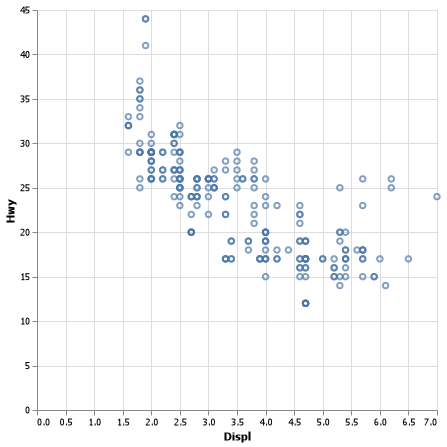

In [5]:
# Start with a very simple scatterplot
mpg |> @vlplot(
    mark = :point,
    x = :Displ,
    y = :Hwy,
    width = 400,
    height = 400
)

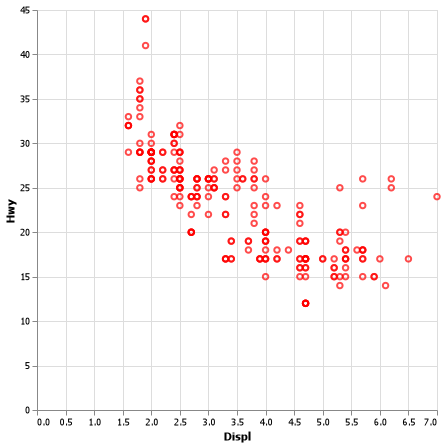

In [6]:
# We have a color feature to the "mark" argument that we can control.
# Let's change the points of the scatterplot to the color red.
mpg |> @vlplot(
    mark = {
        :point,
        color = :red
    },
    x = :Displ,
    y = :Hwy,
    width = 400,
    height = 400
)

Next, let's create a mapping of variables to the color of the points.  The additional encoding of ':n' or ':o' can be used depending on whether the mapping variable is nominal or ordinal.

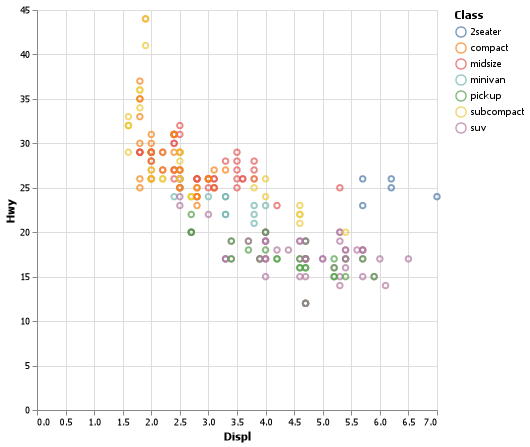

In [7]:
# Nominal color mapping
mpg |> @vlplot(
    mark = :point,
    x = :Displ,
    y = :Hwy,
    color = "Class:n",
    width = 400,
    height = 400
)

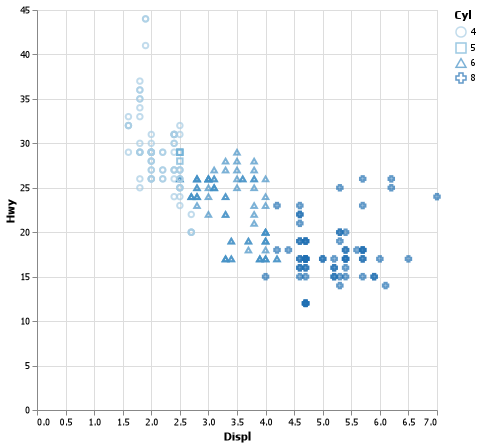

In [8]:
# Ordinal color mapping
mpg |> @vlplot(
    mark = :point,
    x = :Displ,
    y = :Hwy,
    color = "Cyl:o",
    shape = "Cyl:n",
    width = 400,
    height = 400
)

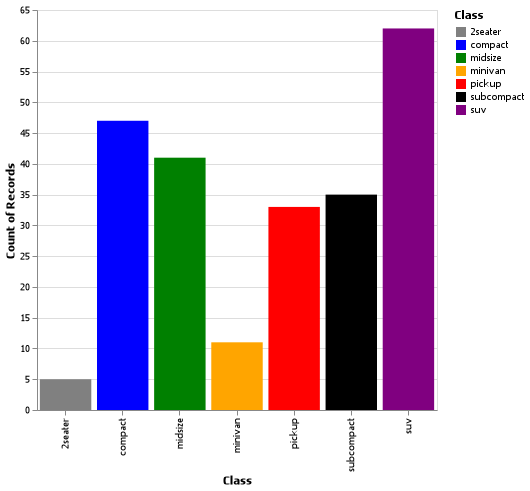

In [9]:
# Column chart example
mpg |> @vlplot(
    mark = :bar,
    x = "Class:n",
    y = "count()",
    color = {
        "Class:n",
        scale = {range = ["gray", "blue", "green", "orange", "red", "black", "purple"]}
    },
    width = 400,
    height = 400
)

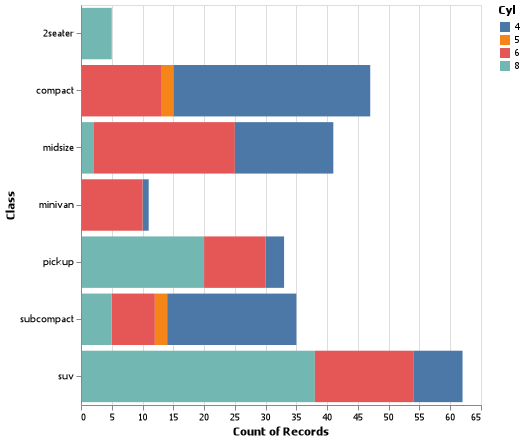

In [10]:
# Stacked bar chart example
mpg |> @vlplot(
    mark = :bar,
    x = "count()",
    y = "Class:n",
    color = "Cyl:n",
    width = 400,
    height = 400
)

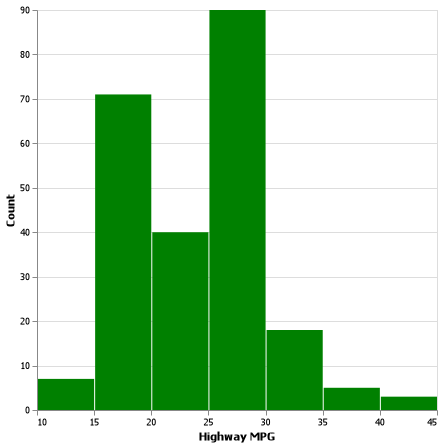

In [11]:
# Histograms can also be created by specifying the "bar" mark with the 'bin = true' argument
mpg |> @vlplot(
    mark = {:bar, color = :green},
    x = {:Hwy, bin = true,
        axis = {title="Highway MPG"}},
    y = {"count()",
        axis = {title="Count"}},
    width = 400,
    height = 400
)

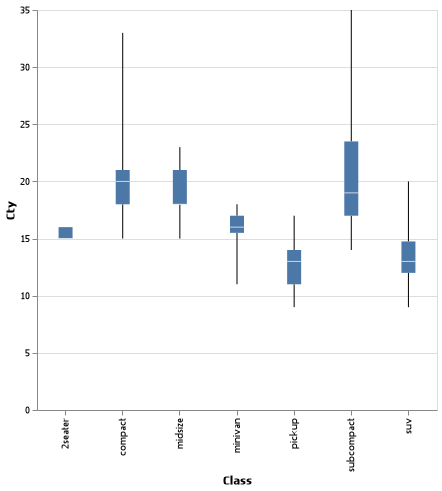

In [12]:
# The final unique object we will create is a boxplot.
mpg |> @vlplot(
    mark = {:boxplot, extent = "min-max"},
    x = "Class:n",
    y = "Cty",
    width = 400,
    height = 400
)

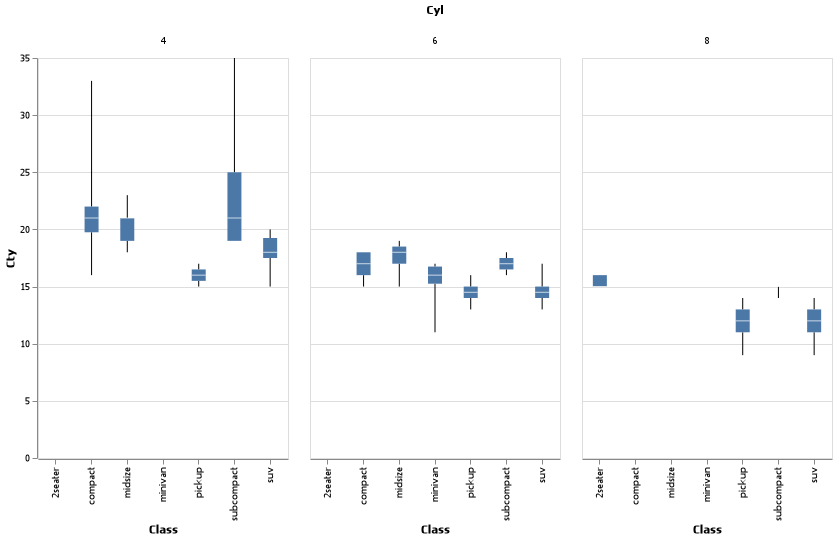

In [13]:
# Plot with transformation applied and broken into columns
mpg |> @vlplot(
    mark = {:boxplot, extent = "min-max"},
    transform = [
        {filter="datum.Cyl != 5"}
    ],
    x = "Class:n",
    y = "Cty",
    column = "Cyl:n",
    width = 250,
    height = 400
)

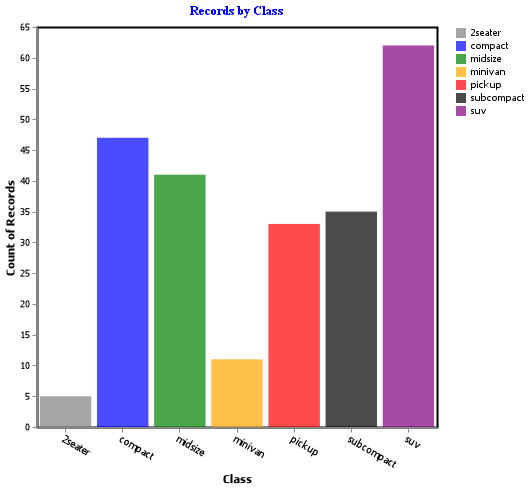

In [14]:
# Final plot example with many configurations
mpg |> @vlplot(
    mark = :bar,
    x = {"Class:n",
        axis = {labelAngle = 30}
    },
    y = "count()",
    title = "Records by Class",
    color = {
        "Class:n",
        scale = {range = ["gray", "blue", "green", "orange", "red", "black", "purple"]}
    },
    opacity = {value = 0.7},
    config = {
        title = {
            color = :blue,
            font = "Times New Roman"
        },
        legend = {
            title = nothing,
        },
        axis = {
            grid = false
        },
        view = {
            stroke = :black,
            strokeWidth = 2
        },
    },
    width = 400,
    height = 400
)